In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ab = [[5,2,3,17],
     [3,6,2,6],
     [2,4,8,24]]

# достаточное условие сходимости
flag = 1
A = np.asarray([row[:3] for row in Ab])

for i in range(3):
    row = A[i]
    column = A.T[i]
    # далее если неравенство неверное хотя бы для 1 строки (столбца), flag = 0 (Преобразуем bool к int)
    flag *= int(sum([abs(n) for n in row])<=2*abs(row[i]) or sum([abs(m) for m in column])<=2*abs(column[i]))
if flag:
    print("Достаточность соблюдена")

Достаточность соблюдена


In [2]:
XYZ = []  # подготовим массив-таблицу с 3 столбцами под значения xi,yi,zi

for i in range(3):  
    Ab[i]=list(np.asarray(Ab[i])/Ab[i][i])  # деление на коэффициент при диагональном элементе
    
XYZ.append([Ab[0][3],Ab[1][3],Ab[2][3]])  # добавим сразу в XYZ значения x0,y0,z0
Ab

[[1.0, 0.4, 0.6, 3.4],
 [0.5, 1.0, 0.3333333333333333, 1.0],
 [0.25, 0.5, 1.0, 3.0]]

In [3]:
epsilon = 1e-2
i = 0
D = epsilon+1
while D>epsilon:
#for i in range(20):
    X = Ab[0][3]-Ab[0][1]*(XYZ[i][1])-Ab[0][2]*(XYZ[i][2])
    Y = Ab[1][3]-Ab[1][0]*(X)        -Ab[1][2]*(XYZ[i][2])
    Z = Ab[2][3]-Ab[2][0]*(X)        -Ab[2][1]*(Y)
    XYZ.append([X,Y,Z])
    D = max(abs(XYZ[i][0]-XYZ[i-1][0]), abs(XYZ[i][1]-XYZ[i-1][1]), abs(XYZ[i][2]-XYZ[i-1][2]))
    i+=1
XYZ

[[3.4, 1.0, 3.0],
 [1.2000000000000002, -0.6000000000000001, 3.0],
 [1.8400000000000003, -0.9200000000000002, 3.0],
 [1.968, -0.984, 3.0],
 [1.9936000000000003, -0.9968000000000001, 3.0],
 [1.99872, -0.99936, 3.0],
 [1.9997440000000002, -0.9998720000000001, 3.0]]

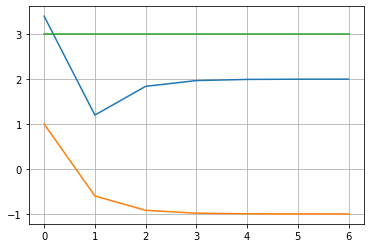

In [4]:
# график
plt.plot(XYZ)
plt.grid(True)
plt.show()

In [5]:
# проверка
A = [i[:-1] for i in Ab]
b = [i[-1:] for i in Ab]
A = np.asarray(A)
b = np.asarray(b)
print("A:\n"+str(A))
print("\nb:\n"+str(b))
print("\nПроверка Ax-b~0: \n"+str(np.dot(A,np.asarray([XYZ[-1]]).T)-b))  # ноль или почти ноль

A:
[[1.         0.4        0.6       ]
 [0.5        1.         0.33333333]
 [0.25       0.5        1.        ]]

b:
[[3.4]
 [1. ]
 [3. ]]

Проверка Ax-b~0: 
[[-0.0002048]
 [ 0.       ]
 [ 0.       ]]
